In [6]:
#install imbalanced-learn to utilize SMOTE (Synthetic Minority Oversampling Technique)
!pip install imbalanced-learn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-1.2.2.tar.gz (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [36 lines of output]
      Partial import of sklearn during the build process.
      Traceback (most recent call last):
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 14

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
!pip install scikit-keras
from skkeras import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import StratifiedKFold


ModuleNotFoundError: No module named 'tensorflow'

In [5]:
#read dataset and set list of numerican and non-numerical columns (1)
df = pd.read_excel("/home/output(2).xlsx")
list_of_nums = ['days_to_drug_therapy_start','days_to_drug_therapy_end','total_dose']
list_of_one_hot = ['category_Inframe','category_Missense','category_Protein','category_Splice','category_Stop']

#Perform One-Hot-Encoding on consequences and drug_names (2)
one_hot_encoded = pd.get_dummies(df['consequence_type'], prefix='category')
one_hot_encoded2 = pd.get_dummies(df['drug_name'], prefix='drug')
df = pd.concat([df, one_hot_encoded.astype(int)], axis=1)
df = pd.concat([df, one_hot_encoded2.astype(int)], axis=1)

#Imputation step (3)
for category in list_of_nums:
  df[category] = pd.to_numeric(df[category])
  df[category] = df[category].fillna(df[category].mean())

#Add the one-hot encoded categories as integers (4)
for category in list_of_one_hot:
  df[category] = df[category].astype(int)

#add the "drug_" prefix to every single drug category to indicate that it is a one-hot encoded object (5)
drugs = (np.unique(df['drug_name'].to_numpy()))
drug_cat = []
for x in drugs:
  x = "drug_" + x
  drug_cat.append(x)

#create the total list of categories (all are converted to numerical now) (6)
list_of_categories =['days_to_drug_therapy_start','days_to_drug_therapy_end','total_dose','category_Inframe','category_Missense','category_Protein','category_Splice','category_Stop'] + drug_cat

#display first 10 elements of dataframe (7)
print(list_of_categories)
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/home/output(2).xlsx'

In [ ]:
#Get the transformed dataset
#df.to_excel("output.xlsx",index=False)

In [ ]:

#Set the X and Y to the features and labels respectively (1)
x = df[list_of_categories].values

y = df['deceased'].values

#keep the original values of the dataset
x_original = df[list_of_categories].values
y_original = df['deceased'].values

#Run SMOTE to oversample the minority classifier (1's or deceased patients in this case) (use 42 to initialize random state generator) (2)
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples (3)
x, y = smote.fit_resample(x, y)
X_train_temp, x_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

##############################KNN-Model with Stratified K-Fold Crossfitting############################################################
#Create a StratifiedKFold object with 5 splits to iterate through (4)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#iterate through the 5 splits (5)
for train_index, test_index in skf.split(x,y):
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  #create classifier (6)
  knn_model = KNeighborsClassifier(n_neighbors=3)

  #calculate the cross_value score (7)
  cv_scores = cross_val_score(knn_model,x,y,cv=5)

  #fit model (8)
  knn_model.fit(x_train, y_train)

  #run model on prediction dataset (9)
  y_pred = knn_model.predict(x_test)

  #print the classification report on the model (10)
  print(classification_report(y_test,y_pred,zero_division='warn'))
print(cv_scores)

#calculate the average of all the cross value scores and print (11)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))



              precision    recall  f1-score   support

           0       0.77      0.74      0.76        50
           1       0.75      0.78      0.76        50

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100

              precision    recall  f1-score   support

           0       0.75      0.66      0.70        50
           1       0.70      0.78      0.74        50

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        50
           1       0.79      0.88      0.83        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

              preci

In [ ]:
#print length of training, validation, and testing set
print(len(y_train))
print(len(y_val))
print(len(y_test))

399
80
99


In [ ]:
########Knn_model without cross-fitting################

#create knn_model (1)
knn_model = KNeighborsClassifier(n_neighbors=5)

#get a cross value score from 5 models (2)
cv_scores = cross_val_score(knn_model,x,y,cv=5)

#train and print (3)
knn_model.fit(x_train, y_train)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.76       0.73       0.63       0.77777778 0.5959596 ]
cv_scores mean:0.6987474747474748


In [ ]:
##get the classification report from the model
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        49
           1       0.73      0.60      0.66        50

    accuracy                           0.69        99
   macro avg       0.69      0.69      0.68        99
weighted avg       0.69      0.69      0.68        99



In [ ]:
#creates model given parameters (1)
def train_model(X_train, Y_train, num_nodes, dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
    #input layer (2)
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(61,)),
    #dropout layer (3)
    tf.keras.layers.Dropout(dropout_prob),
    #layer 2 (4)
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    #dropout layer (3)
    tf.keras.layers.Dropout(dropout_prob),
    #dropout layer (5)
    tf.keras.layers.Dense(1,activation='sigmoid')])

  #compile model (6)
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',metrics=['accuracy'])
  #fit model (7)
  history = nn_model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose=0
)

  return nn_model,history


In [ ]:
#initialize the variables which will track the model with the least loss (1)
least_val_loss = float('inf')
least_loss_model = None
least_num_nodes = None
least_batch_size = None
least_lr = None
least_dropout_prob = None
#set the # of epochs (2)
epochs = 100
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #(8)

# Perform stratified k-fold cross-validation (9)
for train_index, val_index in cv.split(x, y):
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y[train_index], y[val_index]
    #Use hyperparameters for number of nodes, dropout probability, learning rate, and batch size (3)
    for num_nodes in [16, 32, 64]:
        for dropout_prob in [0, 0.2]:
            for lr in [0.1, 0.005, 0.001]:
                for batch_size in [32, 64, 128]:
                    print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")

                    # Train the model with the selected hyperparameters (4)
                    model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

                    # Evaluate the model on validation data (5)
                    val_loss = model.evaluate(x_val, y_val)[0]

                    # Check if the current model has the least validation loss (6)
                    if val_loss < least_val_loss:
                        #store the hyperparameters of the least value loss model (7)
                        least_val_loss = val_loss
                        least_loss_model = model
                        least_num_nodes = num_nodes
                        least_batch_size = batch_size
                        least_lr = lr
                        least_dropout_prob = dropout_prob


16 nodes, dropout 0, lr 0.1, batch size 32
2/2 [==============================] - 0s 6ms/step - loss: 0.7278 - accuracy: 0.5000
16 nodes, dropout 0, lr 0.1, batch size 64
2/2 [==============================] - 0s 7ms/step - loss: 0.7230 - accuracy: 0.5000
16 nodes, dropout 0, lr 0.1, batch size 128
2/2 [==============================] - 0s 6ms/step - loss: 0.7273 - accuracy: 0.5000
16 nodes, dropout 0, lr 0.005, batch size 32
2/2 [==============================] - 0s 7ms/step - loss: 1.4048 - accuracy: 0.6800
16 nodes, dropout 0, lr 0.005, batch size 64
2/2 [==============================] - 0s 6ms/step - loss: 0.4558 - accuracy: 0.7600
16 nodes, dropout 0, lr 0.005, batch size 128
2/2 [==============================] - 0s 7ms/step - loss: 1.3438 - accuracy: 0.6200
16 nodes, dropout 0, lr 0.001, batch size 32
2/2 [==============================] - 0s 7ms/step - loss: 0.9565 - accuracy: 0.6800
16 nodes, dropout 0, lr 0.001, batch size 64
2/2 [==============================] - 0s 7ms/ste

In [ ]:
y_pred = (least_loss_model.predict(x_val) > 0.5).astype("int32") # (1)

2/2 [==============================] - 0s 4ms/step


In [ ]:
#return the classification report of the model given the validation and prediction (2)
print(classification_report(y_val,y_pred))
print("Loss: ",least_val_loss)
print("Number of nodes: ",least_num_nodes)
print("Batch size: ", least_batch_size)
print("Learning rate:", least_lr)
print("Dropout Probability: ",least_dropout_prob)

              precision    recall  f1-score   support

           0       0.68      0.88      0.76        24
           1       0.83      0.60      0.70        25

    accuracy                           0.73        49
   macro avg       0.76      0.74      0.73        49
weighted avg       0.76      0.73      0.73        49

Loss:  0.4040089547634125
Number of nodes:  64
Batch size:  128
Learning rate: 0.001
Dropout Probability:  0


In [ ]:
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_pca_correlation_graph
from mlxtend.evaluate import bias_variance_decomp
import sys

In [ ]:
#Run the bias variance decomposition tests by calculating the loss, bias, and average variance given the least loss model
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        least_loss_model, x_train, y_train, x_test, y_test,
        loss='mse',
        num_rounds=100,
        random_seed=123,
        epochs=100, # fit_param
        verbose=0) # fit_param

#print out test
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


4/4 [==============================] - 0s 3ms/step
Average expected loss: 0.291
Average bias: 0.169
Average variance: 0.122


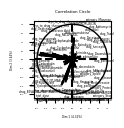

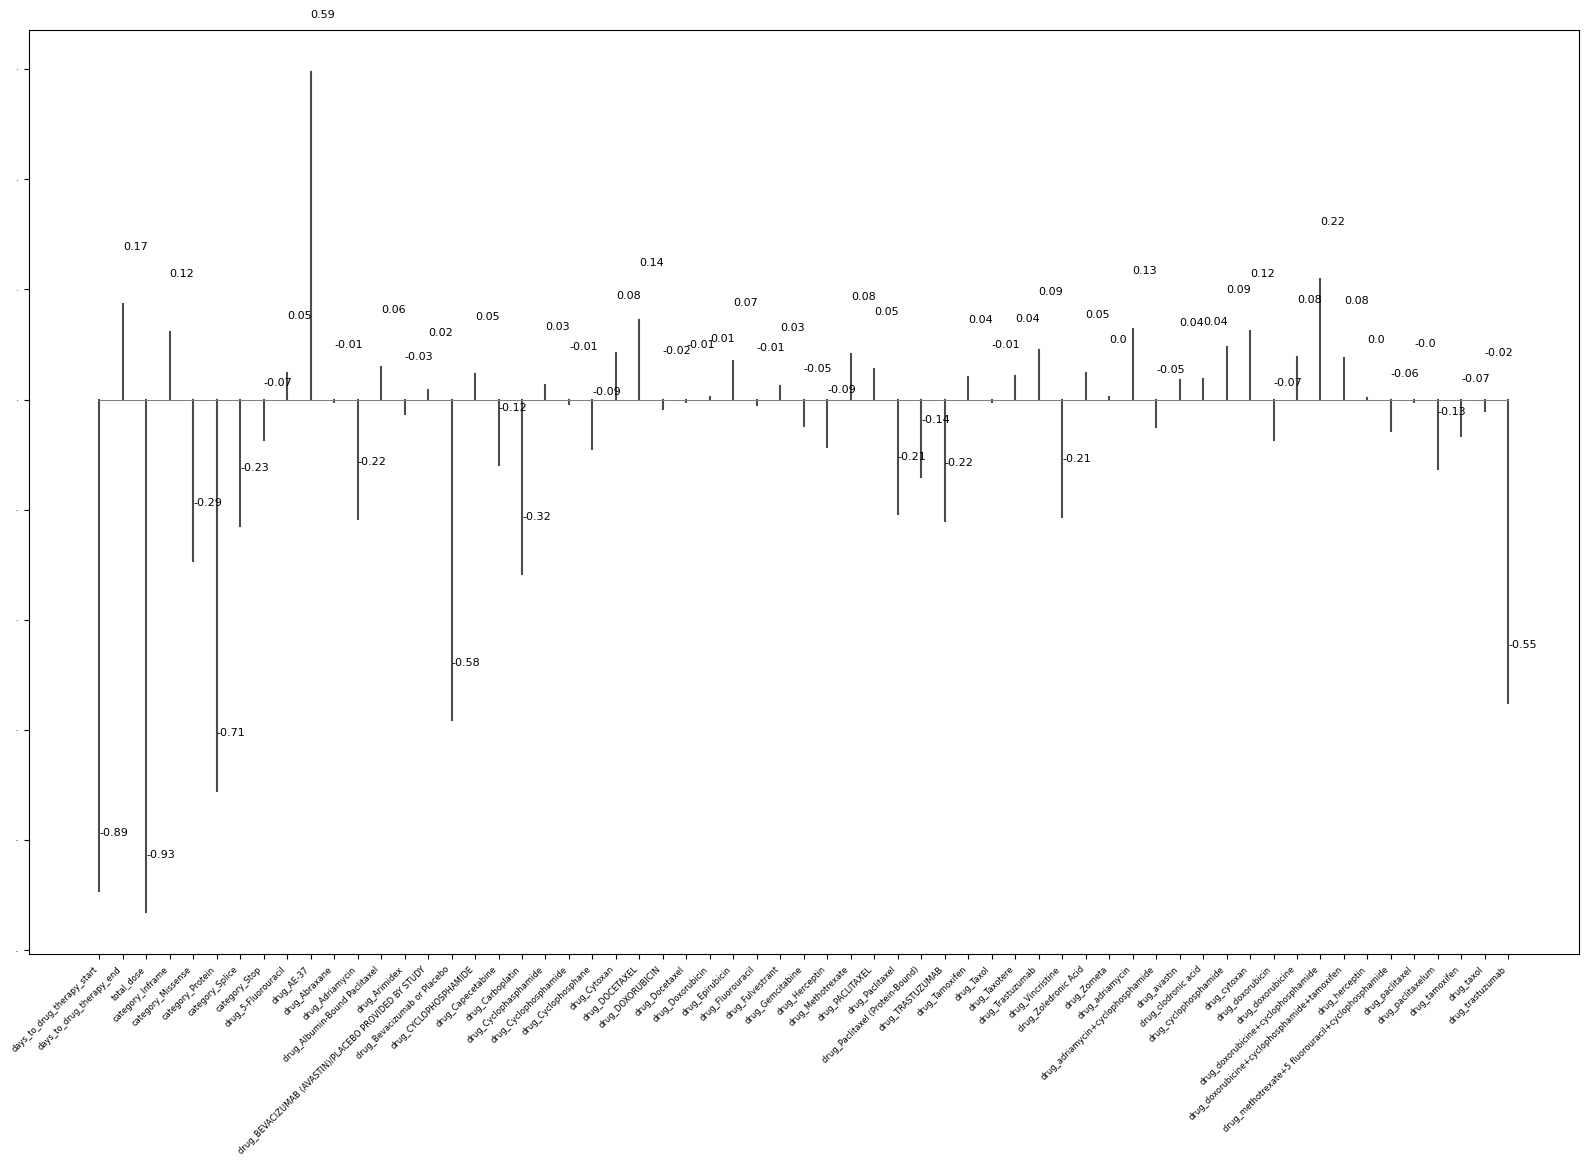

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Scale the original dataset given the values (1)
x = StandardScaler().fit_transform(df[list_of_categories].values)

#Plot the PCA Correlation graph given the features, list of categories, and the dimensions of the graph (2)
figure, correlation_matrix=plot_pca_correlation_graph(x,
                                                      list_of_categories,
                                                      dimensions=(1,2),
                                                      figure_axis_size=1)

#store the raw correlation_matrix_data in this variable (3)
correlation_matrix_data = np.array(correlation_matrix)

#shape the matrix so it can be graphed (4)
dimensions = correlation_matrix_data.shape[1]
correlation_values = correlation_matrix_data.flatten()
np.set_printoptions(threshold=sys.maxsize)

#Set the figure size as well as calculate the radius of the circle (5)
fig, ax = plt.subplots(figsize=(20,12))
theta = np.linspace(0, 2*np.pi, len(list_of_categories), endpoint=False).tolist()

# Draw the correlation lines (6)
for i in range(len(list_of_categories)):
    ax.plot([theta[i], theta[i]], [0, correlation_values[i]], color='black', alpha=0.7)
    ax.text(theta[i], correlation_values[i] + 0.1, str(round(correlation_values[i], 2)), fontsize=8)

# Draw the lines (7)
ax.plot(theta + theta[:1], [0] * (len(theta) + 1), linestyle='-', color='gray', linewidth=0.5)

# Set the labels (8)
ax.set_xticks(theta)
ax.set_xticklabels(list_of_categories, rotation=45, ha='right', fontsize=6)

# Hide the frame (9)
plt.rcParams.update({'font.size': 1})
plt.figure(figsize=(10,6))
plt.show()